In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
url = 'mtcars.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,mpg,disp,hp,wt
0,Mazda RX4,21.0,160.0,110,2.620
1,Mazda RX4 Wag,21.0,160.0,110,2.875
2,Datsun 710,22.8,108.0,93,2.320
3,Hornet 4 Drive,21.4,258.0,110,3.215
4,Hornet Sportabout,18.7,360.0,175,3.440


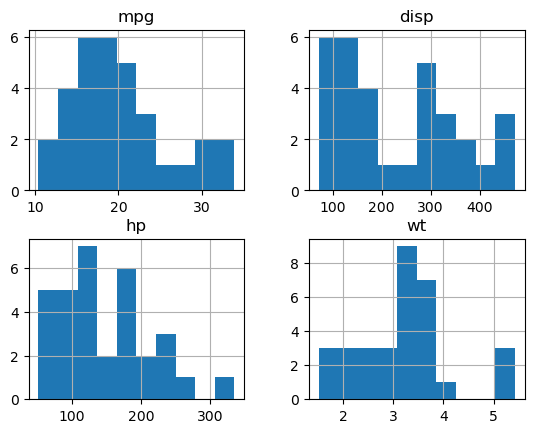

In [9]:
data.hist();

### Correlation

In [10]:
data.corr()

,mpg,disp,hp,wt
mpg,1.000000,-0.847551,-0.776168,-0.867659
disp,-0.847551,1.000000,0.790949,0.887980
hp,-0.776168,0.790949,1.000000,0.658748
wt,-0.867659,0.887980,0.658748,1.000000


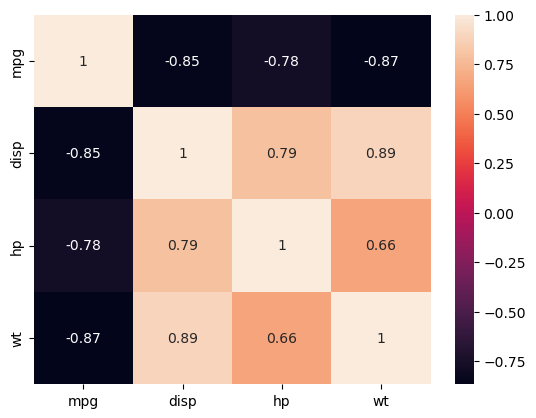

In [16]:
sns.heatmap(data.corr(), annot = True);

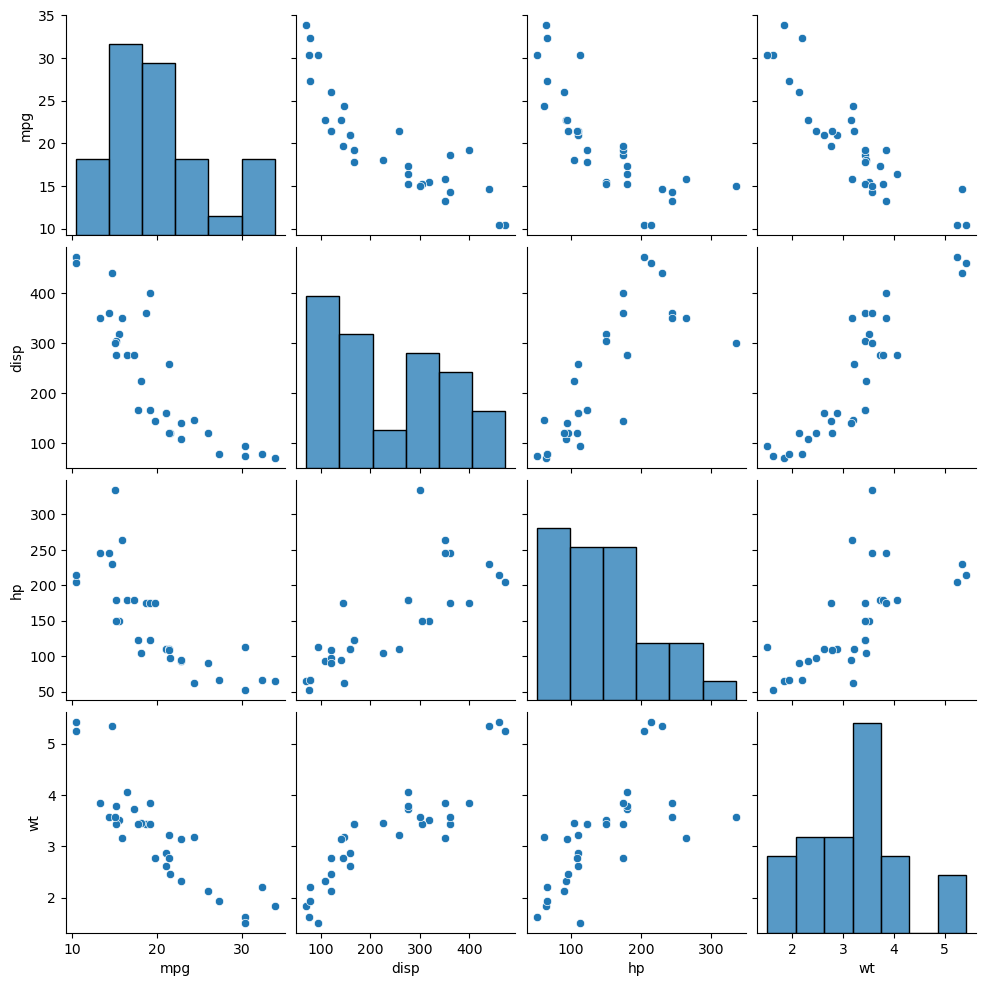

In [18]:
sns.pairplot(data);

In [53]:
from sklearn import linear_model
X = pd.DataFrame(data['wt'])
y = data['mpg']
model = linear_model.LinearRegression()
model.fit(X = pd.DataFrame(data['wt']),y = data['mpg'])
          
print("Hệ số intercept là: ", model.intercept_)
print('Hệ só coeffiient là: ',model.coef_)

Hệ số intercept là:  37.28512616734204
Hệ só coeffiient là:  [-5.34447157]


In [25]:
model.score(X,y)

0.7528327936582646

In [31]:
X_predict = pd.DataFrame(data['wt'])
y_predict = model.predict(X_predict)

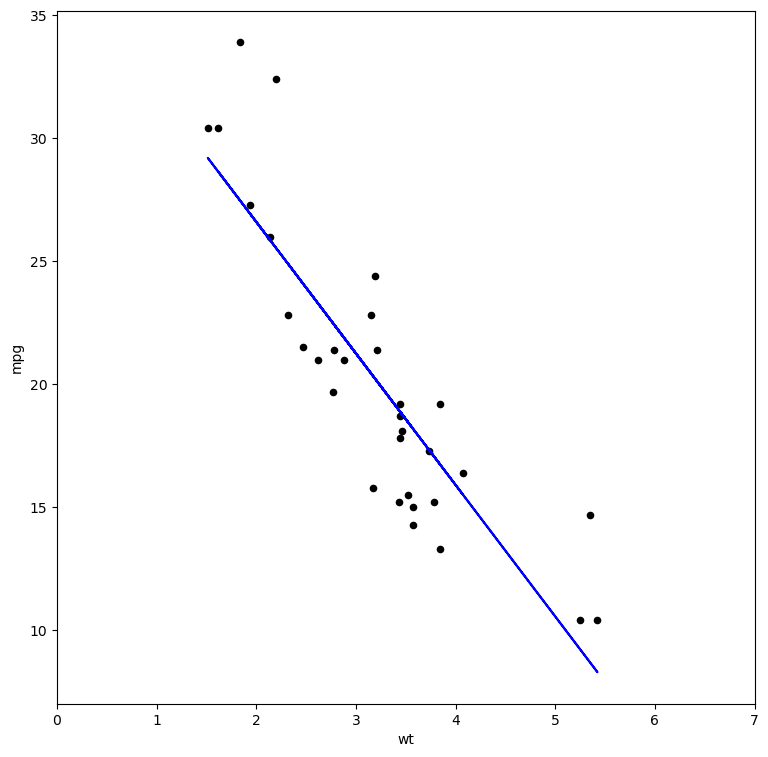

In [33]:
data.plot(kind = 'scatter',x= 'wt', y = 'mpg', figsize = (9,9), color = 'black', xlim = (0,7));
plt.plot(data['wt'], y_predict, color = 'blue');

### Với hàm bậc hai

In [37]:
X = pd.DataFrame([data['wt'], data['wt']**2]).T
y = data['mpg']
model.fit(X, y = data['mpg'])
print("Hệ số intercept là: ", model.intercept_)
print('Hệ só coeffiient là: ',model.coef_)

Hệ số intercept là:  49.93081094945178
Hệ só coeffiient là:  [-13.38033708   1.17108689]


In [38]:
model.score(X,y)

0.8190613581384095

##### $y = -13.38*wt + 1.17*wt^2 +49.93$

/home/toonies/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


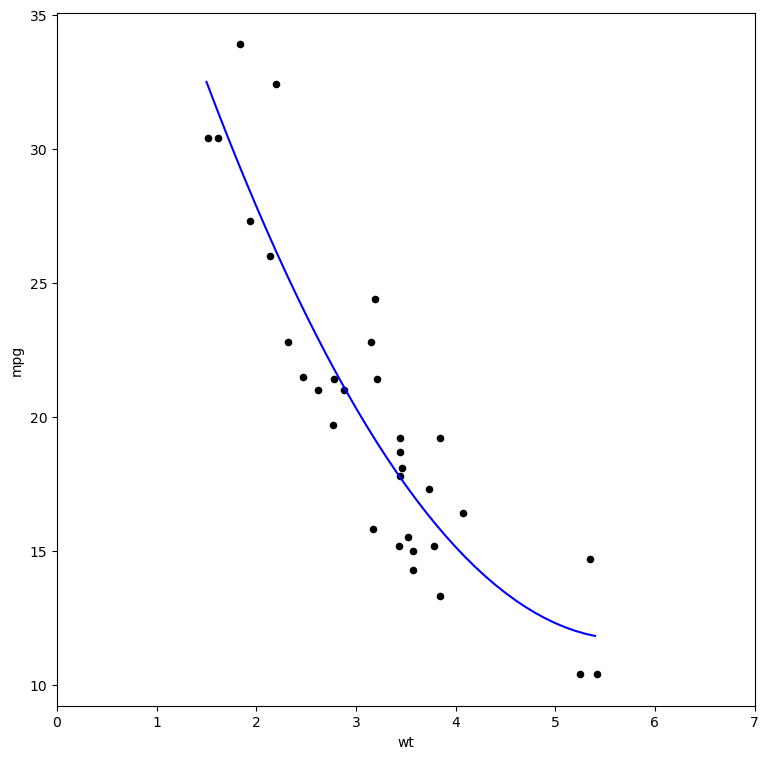

In [42]:
import numpy as np

range = np.arange(1.5,5.5,0.1)
X_range = pd.DataFrame([range, range**2]).T

y_pred = model.predict(X = X_range)
data.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9,9), color = 'black', xlim = (0,7))
plt.plot(range, y_pred, color = 'blue');

# Với hàm bậc 3

In [45]:
X = pd.DataFrame([data['wt'], data['wt']**2, data['wt']**3]).T
y = data['mpg']
model.fit(X, y = data['mpg'])
print("Hệ số intercept là: ", model.intercept_)
print('Hệ só coeffiient là: ',model.coef_)
print('Hệ số độ chính xác: ',model.score(X,y))

Hệ số intercept là:  48.403696227952096
Hệ só coeffiient là:  [-11.82597602   0.68937919   0.04593618]
Hệ số độ chính xác:  0.8191284628478992


In [47]:
X = pd.DataFrame([data['wt'], data['wt']**2, data['wt']**3,data['wt']**4, data['wt']**5]).T
y = data['mpg']
model.fit(X, y = data['mpg'])
print("Hệ số intercept là: ", model.intercept_)
print('Hệ só coeffiient là: ',model.coef_)
print('Hệ số độ chính xác: ',model.score(X,y))

Hệ số intercept là:  -87.71816314293203
Hệ só coeffiient là:  [ 218.88967608 -147.77842682   45.60934841   -6.70138798    0.37968337]
Hệ số độ chính xác:  0.8251088272653264


In [48]:
X = pd.DataFrame([data['wt'], data['wt']**2, data['wt']**3,data['wt']**4, data['wt']**5, data['wt']**6, data['wt']**7,data['wt']**8, data['wt']**9]).T
y = data['mpg']
model.fit(X, y = data['mpg'])
print("Hệ số intercept là: ", model.intercept_)
print('Hệ só coeffiient là: ',model.coef_)
print('Hệ số độ chính xác: ',model.score(X,y))

Hệ số intercept là:  38889.61080970689
Hệ só coeffiient là:  [-1.25317627e+05  1.74784059e+05 -1.38423294e+05  6.86522657e+04
 -2.21343938e+04  4.64432999e+03 -6.12230174e+02  4.60606390e+01
 -1.50849986e+00]
Hệ số độ chính xác:  0.8646786785792278


/home/toonies/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


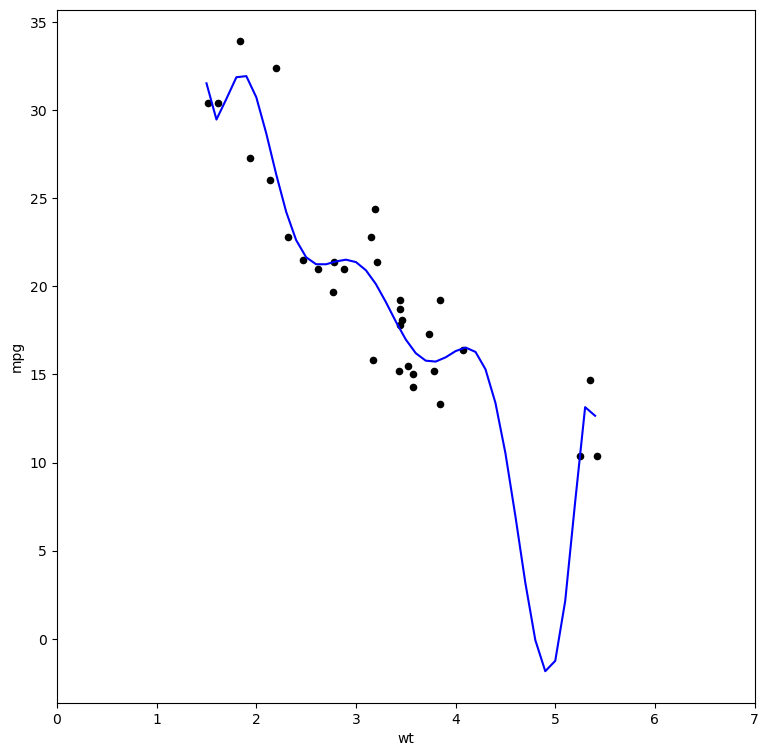

In [49]:
range = np.arange(1.5,5.5,0.1)
X_range = pd.DataFrame([range, range**2, range**3, range**4, range**5,range**6, range**7, range**8, range**9]).T

y_pred = model.predict(X = X_range)
data.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9,9), color = 'black', xlim = (0,7))
plt.plot(range, y_pred, color = 'blue');

### Với nhiều biến

In [59]:
model = linear_model.LinearRegression()
model.fit(X = data.loc[:,['wt','hp']],y = data['mpg'])
print("Hệ số intercept là: ", model.intercept_)
print('Hệ só coeffiient là: ',model.coef_)
print('Hệ số độ chính xác: ',model.score( data.loc[:,['wt','hp']],data['mpg']))

Hệ số intercept là:  37.227270116447215
Hệ só coeffiient là:  [-3.87783074 -0.03177295]
Hệ số độ chính xác:  0.8267854518827914
